<img style="float: right;" width="120" src="http://neueda.conygre.com/pydata/images/neueda-logo.jpeg">
<img style="float: left; margin-top: 0" width="80" src="http://neueda.conygre.com/pydata/images/client-logo.png">
<br><br><br>


# Calculate the Bollinger Band for

> the month moving average of the Closing price for AAPL

## Import the libraries 

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr

%matplotlib inline

## Load the data into a DataFrame


In [37]:
# load AAPL data into df_Boll starting at 1/1/2000 from either
# a) pdr.get_data_yahoo OR
# b) http://neueda.conygre.com/pydata/market_data.xls
df_Boll = pd.read_excel("http://neueda.conygre.com/pydata/market_data.xls", index_col="Date", parse_date=True)
df_Boll.sort_index()

High         Low        Open       Close     Volume  \
Date                                                                    
2012-05-18   45.000000   38.000000   42.049999   38.230000  573576400   
2012-05-21   36.660000   33.000000   36.529999   34.029999  168192700   
2012-05-22   33.590000   30.940001   32.610001   31.000000  101786600   
2012-05-23   32.500000   31.360001   31.370001   32.000000   73600000   
2012-05-24   33.209999   31.770000   32.950001   33.029999   50237200   
...                ...         ...         ...         ...        ...   
2019-12-19  206.300003  202.509995  202.779999  206.059998   16514600   
2019-12-20  207.710007  203.429993  207.479996  206.300003   27306900   
2019-12-23  208.589996  205.679993  206.699997  206.179993   13348900   
2019-12-24  206.789993  205.000000  206.300003  205.119995    6046300   
2019-12-26  207.820007  205.309998  205.570007  207.789993    9350700   

             Adj Close  
Date                    
2012-05-18   38.230000  
2012-05-21   34.029999  
2012-05-22   31.000000  
2012-05-23   32.000000  
2012-05-24   33.029999  
...                ...  
2019-12-19  206.059998  
2019-12-20  206.300003  
2019-12-23  206.179993  
2019-12-24  205.119995  
2019-12-26  207.789993  

[1914 rows x 6 columns]

## Check what has been imported into the DataFrame
- Have a quick look at what we have read in
- No right or wrong way to do this
- Depends on your style, personal preferences, type of data being read in etc
- A few examples
> `df.tail()`
`df.head()`
`df.describe()`
    
**IMPORTANT**<br>
>When working with DataFrames that have Dates as an index, make sure the date values are sorted in an ascending manner

In [38]:
df_Boll

High         Low        Open       Close     Volume  \
Date                                                                    
2012-05-18   45.000000   38.000000   42.049999   38.230000  573576400   
2012-05-21   36.660000   33.000000   36.529999   34.029999  168192700   
2012-05-22   33.590000   30.940001   32.610001   31.000000  101786600   
2012-05-23   32.500000   31.360001   31.370001   32.000000   73600000   
2012-05-24   33.209999   31.770000   32.950001   33.029999   50237200   
...                ...         ...         ...         ...        ...   
2019-12-19  206.300003  202.509995  202.779999  206.059998   16514600   
2019-12-20  207.710007  203.429993  207.479996  206.300003   27306900   
2019-12-23  208.589996  205.679993  206.699997  206.179993   13348900   
2019-12-24  206.789993  205.000000  206.300003  205.119995    6046300   
2019-12-26  207.820007  205.309998  205.570007  207.789993    9350700   

             Adj Close  
Date                    
2012-05-18   38.230000  
2012-05-21   34.029999  
2012-05-22   31.000000  
2012-05-23   32.000000  
2012-05-24   33.029999  
...                ...  
2019-12-19  206.059998  
2019-12-20  206.300003  
2019-12-23  206.179993  
2019-12-24  205.119995  
2019-12-26  207.789993  

[1914 rows x 6 columns]

In [39]:
# get percent change (pct_change()) or Close prices, plot as histogram e.g. 50 bins

df_Boll["pc_change"] = df_Boll["Close"].pct_change()
df_Boll

High         Low        Open       Close     Volume  \
Date                                                                    
2012-05-18   45.000000   38.000000   42.049999   38.230000  573576400   
2012-05-21   36.660000   33.000000   36.529999   34.029999  168192700   
2012-05-22   33.590000   30.940001   32.610001   31.000000  101786600   
2012-05-23   32.500000   31.360001   31.370001   32.000000   73600000   
2012-05-24   33.209999   31.770000   32.950001   33.029999   50237200   
...                ...         ...         ...         ...        ...   
2019-12-19  206.300003  202.509995  202.779999  206.059998   16514600   
2019-12-20  207.710007  203.429993  207.479996  206.300003   27306900   
2019-12-23  208.589996  205.679993  206.699997  206.179993   13348900   
2019-12-24  206.789993  205.000000  206.300003  205.119995    6046300   
2019-12-26  207.820007  205.309998  205.570007  207.789993    9350700   

             Adj Close  pc_change  
Date                               
2012-05-18   38.230000        NaN  
2012-05-21   34.029999  -0.109861  
2012-05-22   31.000000  -0.089039  
2012-05-23   32.000000   0.032258  
2012-05-24   33.029999   0.032187  
...                ...        ...  
2019-12-19  206.059998   0.017580  
2019-12-20  206.300003   0.001165  
2019-12-23  206.179993  -0.000582  
2019-12-24  205.119995  -0.005141  
2019-12-26  207.789993   0.013017  

[1914 rows x 7 columns]

## Calculate the Bollinger Bands for the Adj. Close

- **Middle Band** = Monthly moving average <br>
- **Upper Band** = Monthly moving average + (Monthly standard deviation of price x 2) 
- **Lower Band** = Monthly moving average - (Monthly standard deviation of price x 2)

In [40]:
# 21 days is a good approximation of a single month
days = 21
# get rolling mean and rolling avg of Close for 21 days
df_Boll["middle"] = df_Boll["Close"].rolling(window=days).mean()

# calculate upper and lower bands columns as 2 above and 2 below std
df_Boll["upper"] = df_Boll["Close"].rolling(window=days).mean() + df_Boll["Close"].rolling(window=days).std()*2

df_Boll["lower"] = df_Boll["Close"].rolling(window=days).mean() - df_Boll["Close"].rolling(window=days).std()*2
df_Boll

High         Low        Open       Close     Volume  \
Date                                                                    
2012-05-18   45.000000   38.000000   42.049999   38.230000  573576400   
2012-05-21   36.660000   33.000000   36.529999   34.029999  168192700   
2012-05-22   33.590000   30.940001   32.610001   31.000000  101786600   
2012-05-23   32.500000   31.360001   31.370001   32.000000   73600000   
2012-05-24   33.209999   31.770000   32.950001   33.029999   50237200   
...                ...         ...         ...         ...        ...   
2019-12-19  206.300003  202.509995  202.779999  206.059998   16514600   
2019-12-20  207.710007  203.429993  207.479996  206.300003   27306900   
2019-12-23  208.589996  205.679993  206.699997  206.179993   13348900   
2019-12-24  206.789993  205.000000  206.300003  205.119995    6046300   
2019-12-26  207.820007  205.309998  205.570007  207.789993    9350700   

             Adj Close  pc_change      middle       upper       lower  
Date                                                                   
2012-05-18   38.230000        NaN         NaN         NaN         NaN  
2012-05-21   34.029999  -0.109861         NaN         NaN         NaN  
2012-05-22   31.000000  -0.089039         NaN         NaN         NaN  
2012-05-23   32.000000   0.032258         NaN         NaN         NaN  
2012-05-24   33.029999   0.032187         NaN         NaN         NaN  
...                ...        ...         ...         ...         ...  
2019-12-19  206.059998   0.017580  199.738095  204.752012  194.724177  
2019-12-20  206.300003   0.001165  200.156666  205.815497  194.497836  
2019-12-23  206.179993  -0.000582  200.549523  206.684556  194.414491  
2019-12-24  205.119995  -0.005141  200.849523  207.240159  194.458887  
2019-12-26  207.789993   0.013017  201.230475  208.276056  194.184895  

[1914 rows x 10 columns]

## Plot the results

Use the matplot lib defaults

> of all data from the start of 2016 to the end of the series

Here use Slice from '2016 to the end

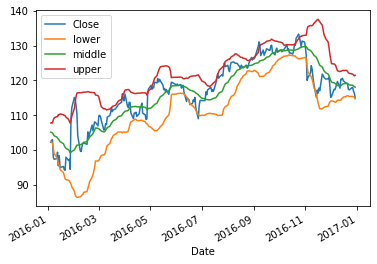

In [46]:
# create a list of the column names we are interested in plotting
# 21d mavg, upper band, lower band, close
df_Boll[["Close","lower","middle", "upper"]]["2016"].plot()
# plot those columns for 2016\


# Improve the presentation of the chart

- 'shading' in the regions between the upper and lower bands
- adding a title, a legend and some labels

The important parts of the python code are

> **style** - fivethirtyeight <br>
**figsize** - dimensions of plot in inches. This is an approximation for computer screens but is more accurate for printing plots<br>
**fill_between** - shades in areas betrween 2 lines

NameError: name 'win' is not defined

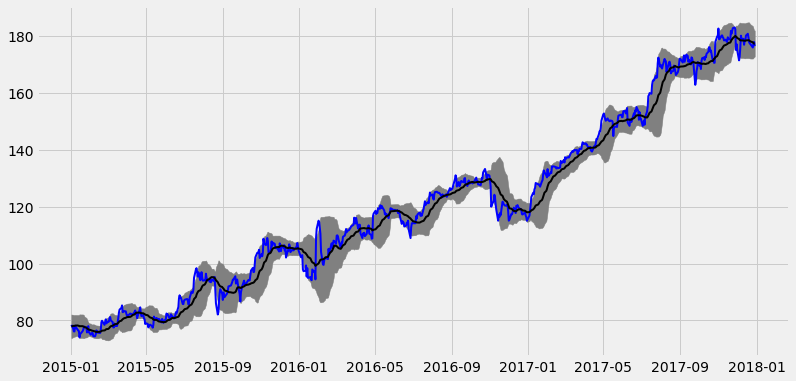

In [48]:
# create some variables
col = 'Close'
start = '2015'
end = '2017'

# set style, empty figure and axes
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

# Get index values for the X axis for the DataFrame
x_axis = df_Boll['2015':'2017'].index.get_level_values(0)

# Plot shaded 'win' Day Bollinger Band for Facebook
ax.fill_between(x_axis, 
                df_Boll[start:end]['upper'], 
                df_Boll[start:end]['lower'], 
                color='grey')

ax.plot(x_axis, df_Boll[start:end][col], color='blue', lw=2)
ax.plot(x_axis, df_Boll[start:end]['middle'], color='black', lw=2)

# Set Title & Show the Image
ax.set_title(str(win) + ' Day Bollinger Band For ' + secname)
ax.set_xlabel('Date (Year/Month)')
ax.set_ylabel('Price(USD)')

plt.show();
